In [8]:
import pandas as pd
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

#Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

In [9]:
#1 feladat: Töltsed be a csv-t és printeld ki az első 10 sorát!

In [10]:
df = pd.read_csv("heart.csv")
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [11]:
#2.feladat: Cseréld ki a Sex oszlop értékeit 0-ra és 1-re!
df['Sex'] = df['Sex'].replace(['M', 'F'], [0,1])
df['Sex'].head(3)
df["Sex"] = df["Sex"].astype('Int64')

TypeError: Image data of dtype object cannot be converted to float

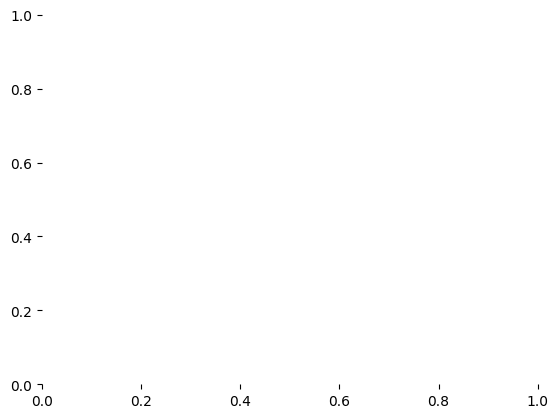

In [37]:
#3. feladat: Nézd meg hogy az egyes oszlopokban milyen típusú adatok vannak!
# Válaszd ki azokat az oszlopokat, amik számmal jellemezhetőek, készíts egy új dataframet ezek alapján és plotold ezek korrelációját!
df[:].dtypes
fig, ax = plt.subplots()
sns.heatmap(df.select_dtypes(include=['int64', 'float64']), annot=True)
plt.show()

<Axes: >

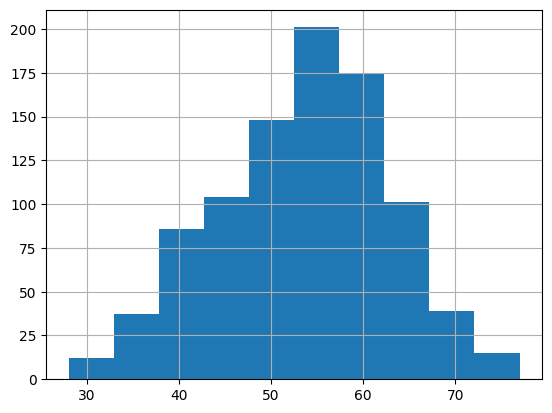

In [13]:
#4. feladat: Készíts egy hisztogrammot a 'age' oszlop alapján!
df['Age'].hist()

In [14]:
#5.feladat: Készíts egy oszlop diagrammot amely bemutatja a nemek eloszlását!

<Axes: xlabel='Sex'>

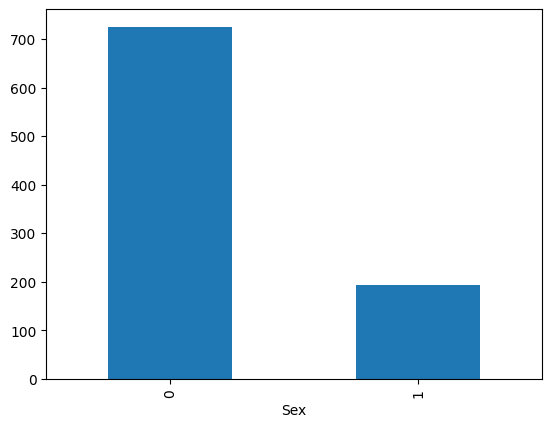

In [15]:
fig, ax = plt.subplots()
#ax.bar([df['Sex'][0], df['Sex'][1]], [df['Sex'].where(lambda x : x == 'M').count(), df['Sex'].where(lambda x : x == 'F').count()])
df['Sex'].value_counts().plot(kind='bar')

In [16]:
#6. feladat: Készíts egy 'box' plotot amely megmutaja hogy a ChestPainType-okhoz milyen MaxHR eloszlás tartozik!

<Axes: xlabel='ChestPainType', ylabel='MaxHR'>

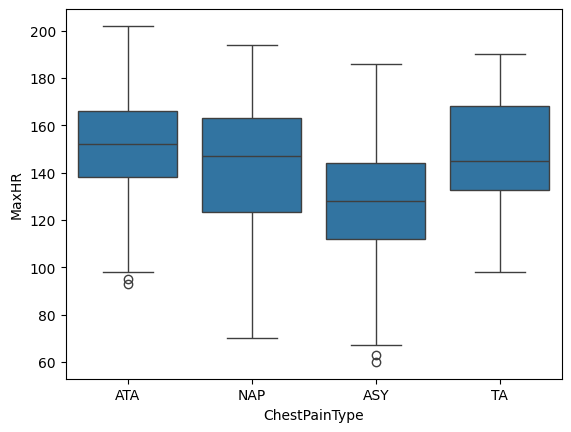

In [17]:
sns.boxplot(x='ChestPainType', y='MaxHR', data=df)

In [18]:
#7. feladat: Néhány mondatban foglald össze, hogy milyen következtetéseket vonhatunk le az adatokból az eddigi vizualizációk alapján!
#(ha szükséges akkor készíts újabb vizualizációkat, amik szerinted hasznosak lehetnek) 

In [19]:
#8. feldata: Készíts egy X és egy y változót, amelyek a tanító adatokat és a HeartDisease oszlopot tartalmazzák!
#Figyelj rá, hogy csak azokat az oszlopokat válaszd ki, amelyek számmal jellemezhetőek!

In [20]:
df = pd.DataFrame(df, columns=['Age','Sex','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease'])
X = df.drop('HeartDisease', axis=1)
Y = df['HeartDisease']

In [21]:
#9. feladat: Spliteld az adatokat train és test adatokra! (70-30 arányban)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=32)

In [23]:
#10. feladat: Taníts fel egy DecisionTreeClassifier-t a train adatokon!

In [24]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [25]:
#11. feladat: Printeld ki milyen pontosságot értél el a modell segítségével!

In [26]:
y_pred = clf.predict(X_test)

In [27]:
#12. feladat: Taníts fel egy RandomForestClassifier-t a train adatokon, Randomized Search segítségével!
#paraméterek: 
param_dist = {'n_estimators': np.random.randint(50,500), 'max_depth': np.random.randint(1,20)}

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [28]:
rf = RandomForestClassifier()
param_dist = {
    'n_estimators': np.random.randint(50, 500, size=10),
    'max_depth': np.random.randint(1, 20, size=10)
}
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=32
)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': array([ 3,  6, 13,  9,  8,  2, 15, 19, 10,  7]),
                                        'n_estimators': array([416,  51, 109, 182,  98, 127, 355, 371, 170, 193])},
                   random_state=32)

In [29]:
#13. feladat: Printeld ki a legjobb paramétereket! (n_estimators, max_depth)

In [30]:
print("Best parameters: ", random_search.best_params_)

Best parameters:  {'n_estimators': 182, 'max_depth': 6}


In [31]:
#14.feladat: Prediktálj a teszt adatokra és printeld ki az accuracy-t!

In [32]:
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7753623188405797


In [33]:
#15. feladat: Készíts egy confusion matrixot a predikciók alapján!

In [34]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [35]:
#16. feladat: Vizualizáld a Random Forest modell első döntési fáját!

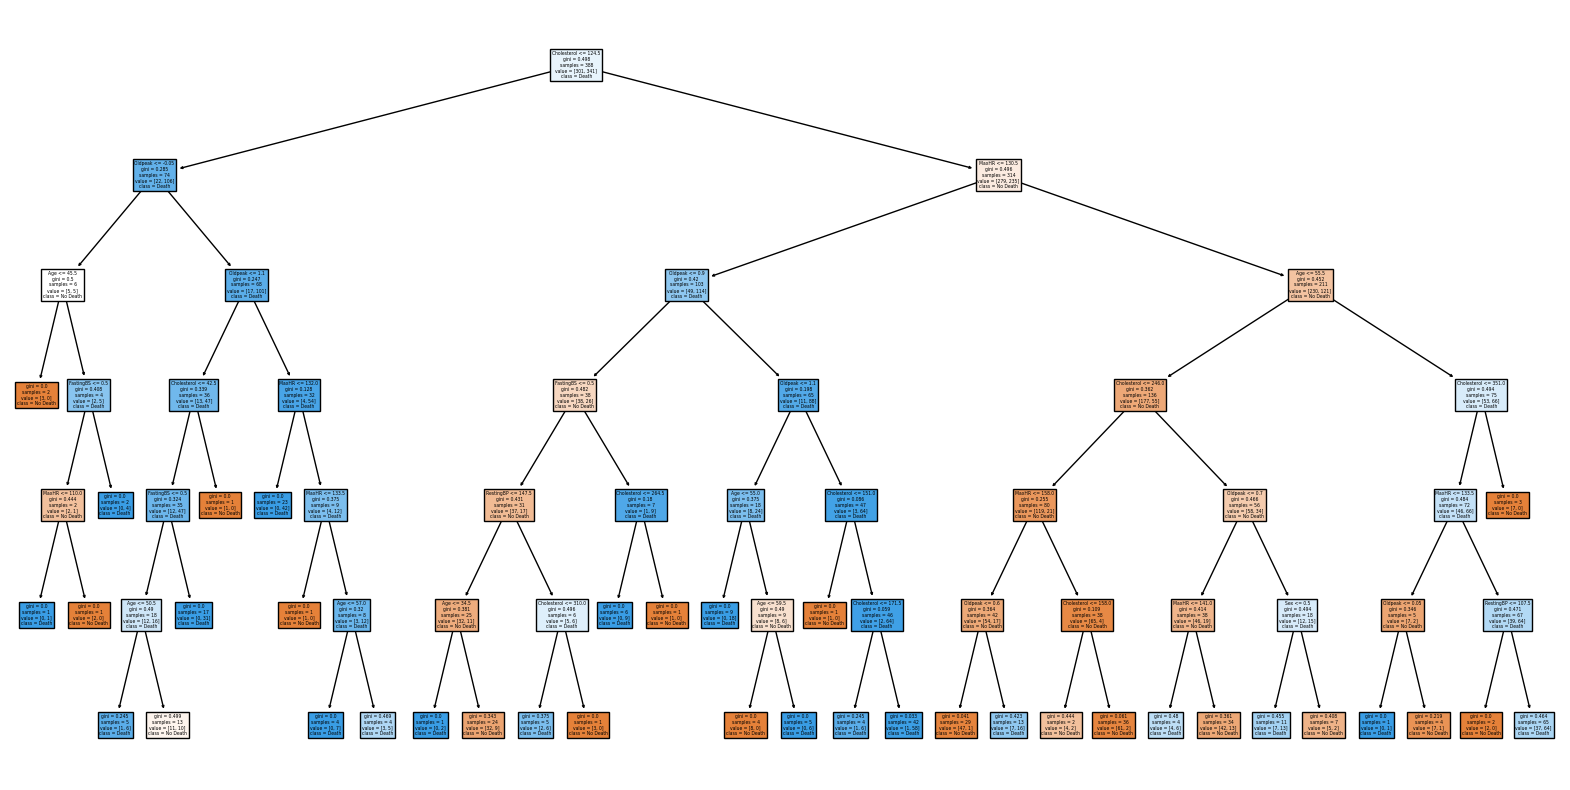

In [36]:
plt.figure(figsize=(20,10))
plot_tree(random_search.best_estimator_.estimators_[0], filled=True, feature_names=X_train.columns, class_names=['No Death', 'Death'])
plt.show()